In [6]:
import pdal
import json
import numpy as np
import requests

print(f"PDAL: {pdal.__version__}")

PDAL: 3.5.3


In [11]:
api_url = "https://8cc8250qpj.execute-api.ap-northeast-1.amazonaws.com/prod"
response = requests.get(f"{api_url}/search", params={
    "bbox": "20000,-69500,20100,-69400",
    "bbox-crs": "EPSG:6676",
    "collections": "fujisan"
})
data = response.json()
print(f"検索結果: {data['numberMatched']} 件のデータセット")

検索結果: 25 件のデータセット


In [12]:
survey_bounds = {
    "min_x": 20000, "max_x": 20100,
    "min_y": -69500, "max_y": -69400
}

pipeline = {
    "pipeline": [{
        "type": "readers.copc",
        "filename": "https://stac.uixai.org/data/fujisan-unified.copc.laz",
        "bounds": f"([{survey_bounds['min_x']}, {survey_bounds['max_x']}], [{survey_bounds['min_y']}, {survey_bounds['max_y']}])"
    }]
}

print("クラウドから点群データを取得中...")
p = pdal.Pipeline(json.dumps(pipeline))
count = p.execute()
print(f"抽出点数: {count:,} 点")

クラウドから点群データを取得中...
抽出点数: 381,376 点


In [13]:
arrays = p.arrays[0]
print("=== 精密測量結果 (Scenario 1) ===")
print(f"座標系: EPSG:6676 (JGD2011 第8系)")
print(f"エリアサイズ: 100m × 100m")
print(f"点数: {len(arrays):,} 点")
print(f"点密度: {len(arrays)/10000:.1f} 点/m²")
print()
print(f"X 範囲: {arrays['X'].min():.2f} ～ {arrays['X'].max():.2f} m")
print(f"Y 範囲: {arrays['Y'].min():.2f} ～ {arrays['Y'].max():.2f} m")
print(f"Z 範囲: {arrays['Z'].min():.2f} ～ {arrays['Z'].max():.2f} m")
print()
print(f"平均標高: {arrays['Z'].mean():.3f} m")
print(f"標高標準偏差: {arrays['Z'].std():.3f} m")

=== 精密測量結果 (Scenario 1) ===
座標系: EPSG:6676 (JGD2011 第8系)
エリアサイズ: 100m × 100m
点数: 381,376 点
点密度: 38.1 点/m²

X 範囲: 20000.00 ～ 20100.00 m
Y 範囲: -69500.00 ～ -69400.00 m
Z 範囲: 3037.08 ～ 3111.51 m

平均標高: 3075.974 m
標高標準偏差: 16.735 m


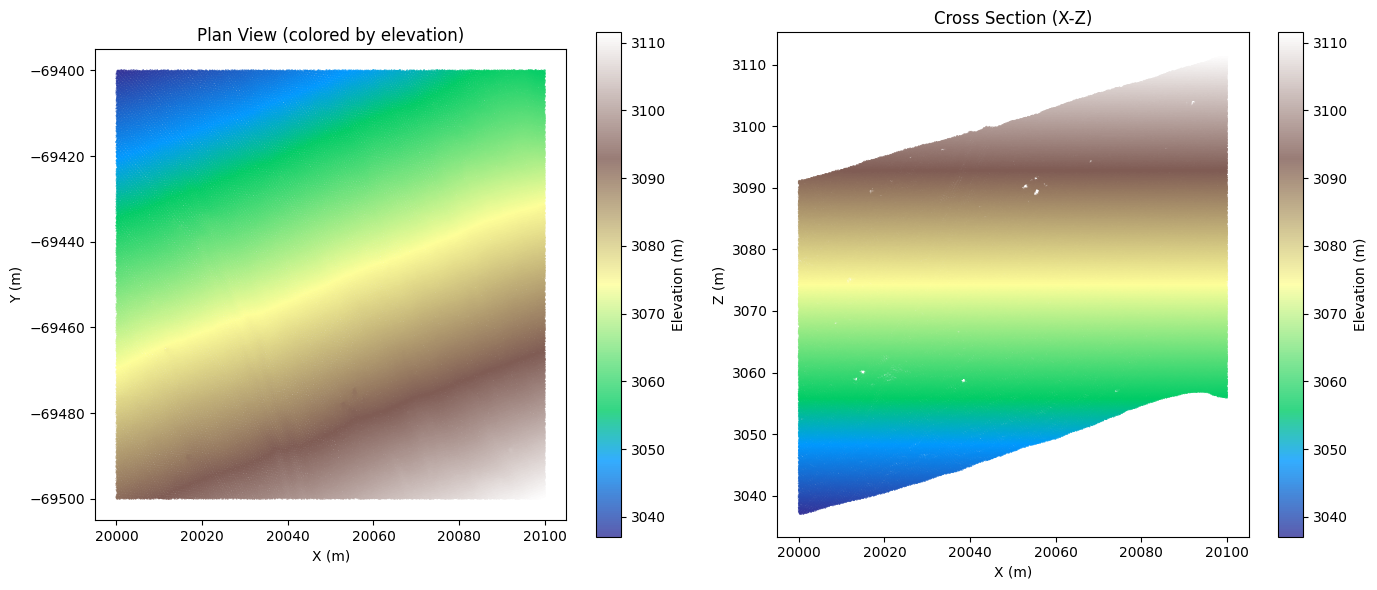

2D visualization complete


In [15]:
import matplotlib.pyplot as plt

arrays = p.arrays[0]

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plan View (X-Y)
sc1 = axes[0].scatter(arrays['X'], arrays['Y'], c=arrays['Z'], 
                       s=0.1, cmap='terrain', alpha=0.8)
axes[0].set_xlabel('X (m)')
axes[0].set_ylabel('Y (m)')
axes[0].set_title('Plan View (colored by elevation)')
axes[0].set_aspect('equal')
plt.colorbar(sc1, ax=axes[0], label='Elevation (m)')

# Cross Section (X-Z)
sc2 = axes[1].scatter(arrays['X'], arrays['Z'], c=arrays['Z'],
                       s=0.1, cmap='terrain', alpha=0.8)
axes[1].set_xlabel('X (m)')
axes[1].set_ylabel('Z (m)')
axes[1].set_title('Cross Section (X-Z)')
plt.colorbar(sc2, ax=axes[1], label='Elevation (m)')

plt.tight_layout()
plt.savefig('precision_survey_2d.png', dpi=150)
plt.show()
print("2D visualization complete")